In [18]:
import numpy as np
from scipy.linalg import fractional_matrix_power as fmpow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import load_wine

In [20]:
class PCA:
    
    def __init__(self, num_components, whitening):
        self.c = num_components
        self.whitening = whitening
        
    def fit(self, X):
        Sigma = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(Sigma)
        sorting_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorting_indices]
        self.eigenvectors = eigenvectors[:, sorting_indices]
        self.Lambda = np.eye(X.shape[1]) * eigenvalues
        return self
    
    def transform(self, X):
        if self.whitening:
            return (fmpow(self.Lambda, -1/2)[:self.c,:self.c] @ self.eigenvectors.T[:self.c,] @ (X - X.mean(axis=0)).T).T
        else:
            return (self.eigenvectors.T[:self.c,] @ (X - X.mean(axis=0)).T).T
        
    def fit_transform(self, X):
        self = self.fit(X)
        return self.transform(X)

## PCA on toy data

In [21]:
simpledata = pd.read_csv('pca_data.csv')

In [22]:
pca = PCA(2, True)
transformed_data = pca.fit_transform(simpledata)
transformed_data = np.array(transformed_data)

In [23]:
np.allclose(np.cov(transformed_data.T), np.eye(2))

True

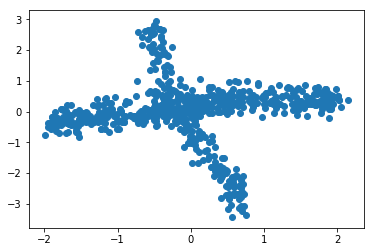

In [24]:
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.show()

## PCA on wine data

In [25]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=";")

In [26]:
data = data - data.mean()
data /= data.std()
total_variance = np.var(data, axis=0).sum()

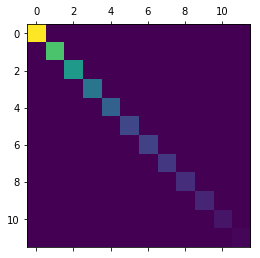

In [27]:
pca = PCA(13, False)
transformed_data = pca.fit_transform(data)
plt.matshow(np.cov(transformed_data.T))
plt.show()

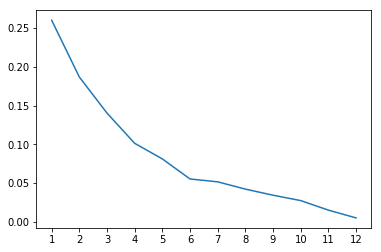

In [28]:
plt.plot(np.arange(1, 13), np.var(transformed_data, axis=0) / total_variance)
plt.xticks(np.arange(1, 13))
plt.show()